In [3]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.misc import derivative
import matplotlib.pyplot as plt
from functools import partial

In [2]:
h = 1e-2
dx = 1e-6
a = 2

In [5]:
def V(x):
    return x**2*(np.pi + np.arctan(x))

def H(x, p):
    return p**2/2 + V(x)

def Hp(x, p):
    return p

def ode(t, y):
    x, p, Phi = y[0], y[1], y[2]

    return [
        p, 
        -2*x*(np.pi+np.arctan(x)) - x**2/(1+x**2),
        p*Hp(p, x) - H(p, x)
    ]

In [7]:
def p(alpha):
    return np.sqrt(2*(E - V(alpha)))

def X(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[0][0]

def Phi(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[2][0]

def J(alpha, t):
    X_halfed = partial(X, t=t)
    return derivative(X_halfed, alpha, dx=dx)

def S(alpha, t):
    return quad(lambda a: p(a) * J(a, t), 0, alpha)

In [8]:
def psi(x, t):
    mu_t = 0
    m_n = 0
    A = 1
    
    return np.exp(1j/h*Phi(x, t) + 1j*np.pi/2*(mu_t - m_n)) * A/np.sqrt(J(x, t)) * np.exp(1j/h*S(x, t))

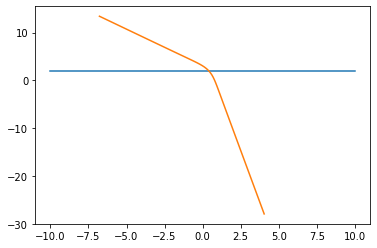

In [9]:
# Вращение лагранжевой поверхности в зависимости от времени

t = 0.4
a = 2
xs = np.linspace(-10, 10, 100)

rks = []
for x in xs:
    x_0 = x
    p_0 = a
    Phi_0 = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])
    rks.append([sol.y[0][0], sol.y[1][0]])
    
plt.plot(xs, [a for _ in xs])
plt.plot([pair[0] for pair in rks], [pair[1] for pair in rks])